In [29]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import re
from sklearn import tree
from sklearn.model_selection import GridSearchCV

In [30]:
train=pd.read_csv('train.csv')
test=pd.read_csv('test.csv')

In [31]:
print(train.shape)
print(test.shape)

(891, 12)
(418, 11)


In [52]:
final=pd.concat([train,test])

In [53]:
final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1309 entries, 0 to 417
Data columns (total 12 columns):
Age            1046 non-null float64
Cabin          295 non-null object
Embarked       1307 non-null object
Fare           1308 non-null float64
Name           1309 non-null object
Parch          1309 non-null int64
PassengerId    1309 non-null int64
Pclass         1309 non-null int64
Sex            1309 non-null object
SibSp          1309 non-null int64
Survived       891 non-null float64
Ticket         1309 non-null object
dtypes: float64(3), int64(4), object(5)
memory usage: 132.9+ KB


In [34]:
# Age has 177 missing values
# Cabin has 687 missing values

In [55]:
final.tail()

,Age,Cabin,Embarked,Fare,Name,Parch,PassengerId,Pclass,Sex,SibSp,Survived,Ticket
413,NaN,NaN,S,8.0500,"Spector, Mr. Woolf",0,1305,3,male,0,NaN,A.5. 3236
414,39.0,C105,C,108.9000,"Oliva y Ocana, Dona. Fermina",0,1306,1,female,0,NaN,PC 17758
415,38.5,NaN,S,7.2500,"Saether, Mr. Simon Sivertsen",0,1307,3,male,0,NaN,SOTON/O.Q. 3101262
416,NaN,NaN,S,8.0500,"Ware, Mr. Frederick",0,1308,3,male,0,NaN,359309
417,NaN,NaN,C,22.3583,"Peter, Master. Michael J",1,1309,3,male,1,NaN,2668


In [45]:
final.tail()

,Age,Cabin,Embarked,Fare,Name,Parch,PassengerId,Pclass,Sex,SibSp,Survived,Ticket
413,NaN,NaN,S,8.0500,"Spector, Mr. Woolf",0,1305,3,male,0,NaN,A.5. 3236
414,39.0,C105,C,108.9000,"Oliva y Ocana, Dona. Fermina",0,1306,1,female,0,NaN,PC 17758
415,38.5,NaN,S,7.2500,"Saether, Mr. Simon Sivertsen",0,1307,3,male,0,NaN,SOTON/O.Q. 3101262
416,NaN,NaN,S,8.0500,"Ware, Mr. Frederick",0,1308,3,male,0,NaN,359309
417,NaN,NaN,C,22.3583,"Peter, Master. Michael J",1,1309,3,male,1,NaN,2668


In [56]:
final.shape

(1309, 12)

In [71]:
# Append a new column which tells that if a passenger has cabin or not
final['Has_cabin']=final['Cabin'].notnull().astype(int)

In [72]:
# Adding a column in dataset which will contain Title of every passenger name
def add_title(name):
    pat_1=re.compile(r'Mr')
    pat_2=re.compile(r'Mrs')
    pat_3=re.compile(r'Miss')
    pat_4=re.compile(r'Master')
    for i in range(0,1309):
        str=name[i].split(',')
        if(pat_2.search(str[1])):
            name[i]='Mrs'
        elif(pat_1.search(str[1])):
            name[i]='Mr'
        elif(pat_3.search(str[1])):
            name[i]='Miss'
        elif(pat_4.search(str[1])):
            name[i]='Master'
        else:
            name[i]='Special'
        
        
final['Title']=final['Name']
np.apply_along_axis(add_title,0,final['Title'])
    

array(None, dtype=object)

In [73]:
final.head()

,Age,Cabin,Embarked,Fare,Name,Parch,PassengerId,Pclass,Sex,SibSp,Survived,Ticket,Has_cabin,Title
0,NaN,NaN,S,7.2500,"Braund, Mr. Owen Harris",0,1,3,male,1,0.0,A/5 21171,0,Mr
1,NaN,C85,C,71.2833,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,2,1,female,1,1.0,PC 17599,1,Mrs
2,NaN,NaN,S,7.9250,"Heikkinen, Miss. Laina",0,3,3,female,0,1.0,STON/O2. 3101282,0,Miss
3,NaN,C123,S,53.1000,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,4,1,female,1,1.0,113803,1,Mrs
4,NaN,NaN,S,8.0500,"Allen, Mr. William Henry",0,5,3,male,0,0.0,373450,0,Mr


In [60]:
final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1309 entries, 0 to 417
Data columns (total 14 columns):
Age            1046 non-null float64
Cabin          295 non-null object
Embarked       1307 non-null object
Fare           1308 non-null float64
Name           1309 non-null object
Parch          1309 non-null int64
PassengerId    1309 non-null int64
Pclass         1309 non-null int64
Sex            1309 non-null object
SibSp          1309 non-null int64
Survived       891 non-null float64
Ticket         1309 non-null object
Has_cabin      1309 non-null int32
Title          1309 non-null object
dtypes: float64(3), int32(1), int64(4), object(6)
memory usage: 148.3+ KB


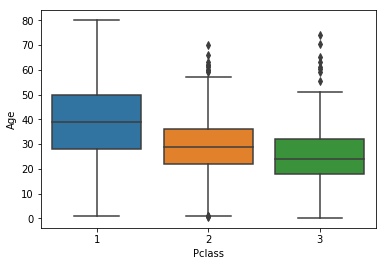

In [61]:
sns.boxplot(x='Pclass',y='Age',data=final)

In [62]:
final['Title'].value_counts()

Mr         758
Miss       258
Mrs        201
Master      61
Special     31
Name: Title, dtype: int64

In [75]:
final['Age']=final['Age'].fillna(final['Age'].mean())

In [76]:
final['Embarked']=final['Embarked'].fillna('S')

In [77]:
final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1309 entries, 0 to 417
Data columns (total 14 columns):
Age            1309 non-null float64
Cabin          295 non-null object
Embarked       1309 non-null object
Fare           1308 non-null float64
Name           1309 non-null object
Parch          1309 non-null int64
PassengerId    1309 non-null int64
Pclass         1309 non-null int64
Sex            1309 non-null object
SibSp          1309 non-null int64
Survived       891 non-null float64
Ticket         1309 non-null object
Has_cabin      1309 non-null int32
Title          1309 non-null object
dtypes: float64(3), int32(1), int64(4), object(6)
memory usage: 188.3+ KB


In [78]:
final.head()

,Age,Cabin,Embarked,Fare,Name,Parch,PassengerId,Pclass,Sex,SibSp,Survived,Ticket,Has_cabin,Title
0,24.0,NaN,S,7.2500,"Braund, Mr. Owen Harris",0,1,3,male,1,0.0,A/5 21171,0,Mr
1,37.0,C85,C,71.2833,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,2,1,female,1,1.0,PC 17599,1,Mrs
2,24.0,NaN,S,7.9250,"Heikkinen, Miss. Laina",0,3,3,female,0,1.0,STON/O2. 3101282,0,Miss
3,37.0,C123,S,53.1000,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,4,1,female,1,1.0,113803,1,Mrs
4,24.0,NaN,S,8.0500,"Allen, Mr. William Henry",0,5,3,male,0,0.0,373450,0,Mr


In [79]:
final.describe()

,Age,Fare,Parch,PassengerId,Pclass,SibSp,Survived,Has_cabin
count,1309.000000,1308.000000,1309.000000,1309.000000,1309.000000,1309.000000,891.000000,1309.000000
mean,28.777247,33.295479,0.385027,655.000000,2.294882,0.498854,0.383838,0.225363
std,4.840664,51.758668,0.865560,378.020061,0.837836,1.041658,0.486592,0.417981
min,24.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000
25%,24.000000,7.895800,0.000000,328.000000,2.000000,0.000000,0.000000,0.000000
50%,28.777247,14.454200,0.000000,655.000000,3.000000,0.000000,0.000000,0.000000
75%,29.000000,31.275000,0.000000,982.000000,3.000000,1.000000,1.000000,0.000000
max,37.000000,512.329200,9.000000,1309.000000,3.000000,8.000000,1.000000,1.000000


In [81]:
final['Categorical_Age']=pd.qcut(final['Age'],4,labels=['A','B','C','D'])

ValueError: Bin edges must be unique: array([24.        , 24.        , 28.77724665, 29.        , 37.        ]).
You can drop duplicate edges by setting the 'duplicates' kwarg

In [69]:
final['Categorical_Age'].value_counts()

KeyError: 'Categorical_Age'

In [25]:
final['Categorical_Fare']=pd.qcut(final['Fare'],5,labels=['LC','LM','M','UM','U'])

In [316]:
final['Categorical_Fare'].value_counts()

LC    275
UM    262
U     259
M     258
LM    254
Name: Categorical_Fare, dtype: int64

In [317]:
final.head()

,Age,Cabin,Embarked,Fare,Name,Parch,PassengerId,Pclass,Sex,SibSp,Survived,Ticket,Has_cabin,Title,Categorical_Age,Categorical_Fare
0,22.0,NaN,S,7.2500,"Braund, Mr. Owen Harris",0,1,3,male,1,0.0,A/5 21171,0,Mr,A,LC
1,38.0,C85,C,71.2833,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,2,1,female,1,1.0,PC 17599,1,Mrs,D,U
2,26.0,NaN,S,7.9250,"Heikkinen, Miss. Laina",0,3,3,female,0,1.0,STON/O2. 3101282,0,Miss,B,LM
3,35.0,C123,S,53.1000,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,4,1,female,1,1.0,113803,1,Mrs,C,U
4,35.0,NaN,S,8.0500,"Allen, Mr. William Henry",0,5,3,male,0,0.0,373450,0,Mr,C,LM


In [318]:
final=final.drop(labels=['Cabin','Name','Parch','PassengerId','Ticket','Age','Fare','SibSp'],axis=1)

In [320]:
final.tail()

,Embarked,Pclass,Sex,Survived,Has_cabin,Title,Categorical_Age,Categorical_Fare
413,S,3,male,NaN,0,Mr,B,LM
414,C,1,female,NaN,1,Special,D,U
415,S,3,male,NaN,0,Mr,D,LC
416,S,3,male,NaN,0,Mr,B,LM
417,C,3,male,NaN,0,Master,B,UM


In [321]:
final=pd.get_dummies(final,columns=['Sex'],drop_first=True)

In [322]:
final=pd.get_dummies(final,columns=['Title'],drop_first=True)

In [323]:
final=pd.get_dummies(final,columns=['Categorical_Fare'],drop_first=True)

In [324]:
final=pd.get_dummies(final,columns=['Embarked'],drop_first=True)

In [325]:
final=pd.get_dummies(final,columns=['Categorical_Age'],drop_first=True)

In [326]:
final.tail()

,Pclass,Survived,Has_cabin,Sex_male,Title_Miss,Title_Mr,Title_Mrs,Title_Special,Categorical_Fare_LM,Categorical_Fare_M,Categorical_Fare_UM,Categorical_Fare_U,Embarked_Q,Embarked_S,Categorical_Age_B,Categorical_Age_C,Categorical_Age_D
413,3,NaN,0,1,0,1,0,0,1,0,0,0,0,1,1,0,0
414,1,NaN,1,0,0,0,0,1,0,0,0,1,0,0,0,0,1
415,3,NaN,0,1,0,1,0,0,0,0,0,0,0,1,0,0,1
416,3,NaN,0,1,0,1,0,0,1,0,0,0,0,1,1,0,0
417,3,NaN,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0


In [327]:
final.shape

(1309, 17)

In [328]:
final['Survived'] = final.Survived.apply(lambda x: int(x))

ValueError: cannot convert float NaN to integer

In [329]:
final.head()

,Pclass,Survived,Has_cabin,Sex_male,Title_Miss,Title_Mr,Title_Mrs,Title_Special,Categorical_Fare_LM,Categorical_Fare_M,Categorical_Fare_UM,Categorical_Fare_U,Embarked_Q,Embarked_S,Categorical_Age_B,Categorical_Age_C,Categorical_Age_D
0,3,0.0,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0
1,1,1.0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,1
2,3,1.0,0,0,1,0,0,0,1,0,0,0,0,1,1,0,0
3,1,1.0,1,0,0,0,1,0,0,0,0,1,0,1,0,1,0
4,3,0.0,0,1,0,1,0,0,1,0,0,0,0,1,0,1,0


In [333]:
y_test=final['Survived']
x_test=final[0:891]

In [336]:
y_test = y_test[~np.isnan(y_test)]

In [340]:
x_test.shape

(891, 16)

In [341]:
print(y.shape)

(891,)


In [342]:
x_test.head()

,Pclass,Has_cabin,Sex_male,Title_Miss,Title_Mr,Title_Mrs,Title_Special,Categorical_Fare_LM,Categorical_Fare_M,Categorical_Fare_UM,Categorical_Fare_U,Embarked_Q,Embarked_S,Categorical_Age_B,Categorical_Age_C,Categorical_Age_D
0,3,0,1,0,1,0,0,0,0,0,0,0,1,0,0,0
1,1,1,0,0,0,1,0,0,0,0,1,0,0,0,0,1
2,3,0,0,1,0,0,0,1,0,0,0,0,1,1,0,0
3,1,1,0,0,0,1,0,0,0,0,1,0,1,0,1,0
4,3,0,1,0,1,0,0,1,0,0,0,0,1,0,1,0


In [345]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression()
classifier.fit(x_test, y_test)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [346]:
x_train=final[891:1309]

In [374]:
x_train.shape

(418, 16)

In [375]:
y_pred = classifier.predict(x_train)

In [376]:
print(y_pred.size)

418


In [377]:
submit=pd.DataFrame(y_pred)
rand=np.arange(892,1310,1,dtype=int)

In [378]:
print(rand)

[ 892  893  894  895  896  897  898  899  900  901  902  903  904  905
  906  907  908  909  910  911  912  913  914  915  916  917  918  919
  920  921  922  923  924  925  926  927  928  929  930  931  932  933
  934  935  936  937  938  939  940  941  942  943  944  945  946  947
  948  949  950  951  952  953  954  955  956  957  958  959  960  961
  962  963  964  965  966  967  968  969  970  971  972  973  974  975
  976  977  978  979  980  981  982  983  984  985  986  987  988  989
  990  991  992  993  994  995  996  997  998  999 1000 1001 1002 1003
 1004 1005 1006 1007 1008 1009 1010 1011 1012 1013 1014 1015 1016 1017
 1018 1019 1020 1021 1022 1023 1024 1025 1026 1027 1028 1029 1030 1031
 1032 1033 1034 1035 1036 1037 1038 1039 1040 1041 1042 1043 1044 1045
 1046 1047 1048 1049 1050 1051 1052 1053 1054 1055 1056 1057 1058 1059
 1060 1061 1062 1063 1064 1065 1066 1067 1068 1069 1070 1071 1072 1073
 1074 1075 1076 1077 1078 1079 1080 1081 1082 1083 1084 1085 1086 1087
 1088 

In [379]:
submit['PassengerId']=rand

In [380]:
submit.head()

,0,PassengerId
0,0.0,892
1,0.0,893
2,0.0,894
3,0.0,895
4,1.0,896


In [381]:
sub=pd.DataFrame(rand)

In [382]:
sub.head()

,0
0,892
1,893
2,894
3,895
4,896


In [383]:
sub['Survived']=y_pred

In [384]:
sub.head()

,0,Survived
0,892,0.0
1,893,0.0
2,894,0.0
3,895,0.0
4,896,1.0


In [385]:
sub.columns=['PassengerId','Survived']

In [386]:
sub.head()

,PassengerId,Survived
0,892,0.0
1,893,0.0
2,894,0.0
3,895,0.0
4,896,1.0


In [387]:
sub['Survived'] = sub.Survived.apply(lambda x: int(x))

In [388]:
sub.head()

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,1


In [389]:
sub.to_csv('My_sub',index=False)

In [394]:
clf=tree.DecisionTreeClassifier(max_depth=3)

In [395]:
clf.fit(x_test,y_test)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=3,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [397]:
pred=clf.predict(x_train)

In [399]:
del sub['Survived']

In [400]:
sub['Survived']=pred

In [403]:
sub.head()

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1


In [402]:
sub['Survived'] = sub.Survived.apply(lambda x: int(x))

In [404]:
sub.to_csv('My_sub',index=False)

In [1]:
from sklearn.neighbors import KNeighborsClassifier
KNN=KNeighborsClassifier(n_neighbors=3)